In [34]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
dados = pd.read_csv(uri)

In [35]:
a_renomear = {
    'expected_hours' : 'horas_esperadas',
    'price' : 'preco',
    'unfinished' : 'nao_finalizado'
}

dados = dados.rename(columns = a_renomear)

In [36]:
dados.head()

,nao_finalizado,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [37]:
trocar = {
    0:1,
    1:0
}
trocar_nome = {
    'nao_finalizado' : 'finalizado'
}

dados['nao_finalizado'] = dados.nao_finalizado.map(trocar)
dados = dados.rename(columns = trocar_nome)

<AxesSubplot:xlabel='horas_esperadas', ylabel='preco'>

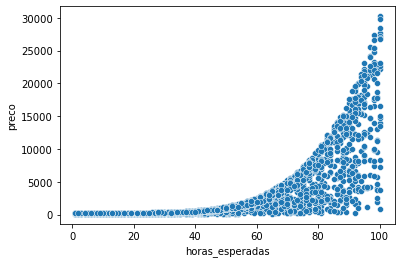

In [38]:
import seaborn as sns

sns.scatterplot(x="horas_esperadas",y="preco",data=dados)

<AxesSubplot:xlabel='horas_esperadas', ylabel='preco'>

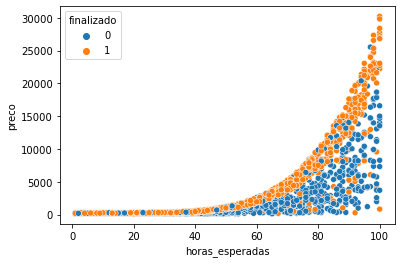

In [39]:
sns.scatterplot(x="horas_esperadas",y="preco",hue="finalizado",data=dados)

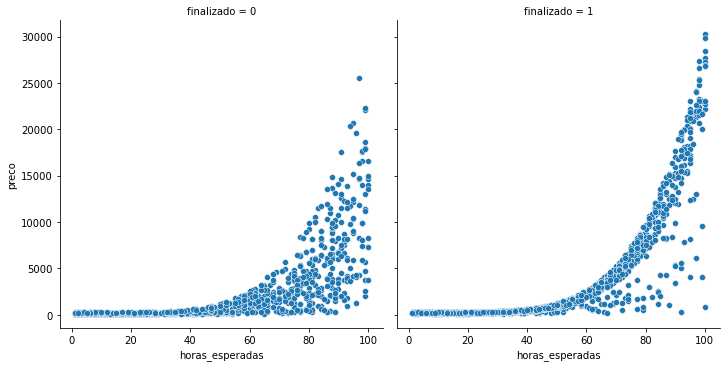

In [40]:
sns.relplot(x="horas_esperadas",y="preco",col="finalizado",data=dados)

In [41]:
x = dados[['horas_esperadas','preco']]
y = dados['finalizado']

In [42]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

SEED = 20

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, random_state = SEED, stratify = y, test_size = 0.25)

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes)
acuracia

C:\Users\Natha\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.4740740740740741

In [50]:
import numpy as np

previsoes_de_base = np.ones(540)
acuracia = accuracy_score(teste_y, previsoes_de_base) * 100
print(f'a acuracia de base line foi {acuracia:.2f}%')

a acuracia de base line foi 52.59%


<AxesSubplot:xlabel='horas_esperadas', ylabel='preco'>

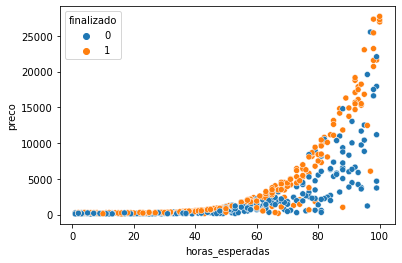

In [52]:
sns.scatterplot(x="horas_esperadas",y='preco',hue=teste_y,data=teste_x)

In [55]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()

In [59]:
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

In [61]:
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

In [63]:
z = modelo.predict(pontos)
z = z.reshape(xx.shape)
z

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int64)

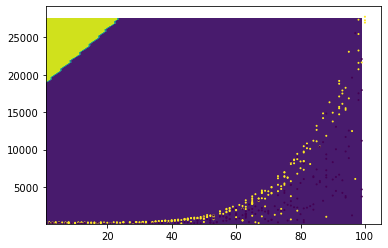

In [67]:
import matplotlib.pyplot as plt

plt.contourf(xx, yy, z)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1)

TypeError: '(slice(None, None, None), 0)' is an invalid key

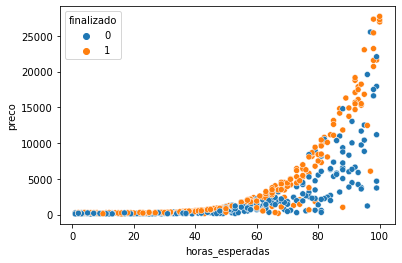

In [77]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

SEED = 20

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, random_state = SEED, stratify = y, test_size = 0.25)

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes)
acuracia

sns.scatterplot(x="horas_esperadas",y='preco',hue=teste_y,data=teste_x)

x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

z = modelo.predict(pontos)
z = z.reshape(xx.shape)

plt.contourf(xx, yy, z, alpha=0.25)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1)

ValueError: 'c' argument has 540 elements, which is inconsistent with 'x' and 'y' with size 1617.

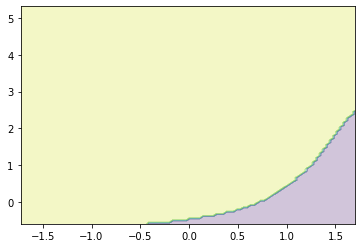

In [79]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

SEED = 20

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, random_state = SEED, stratify = y, test_size = 0.25)

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes)
acuracia

data_x = treino_x[:,0]
data_y = treino_x[:,1]

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

z = modelo.predict(pontos)
z = z.reshape(xx.shape)

plt.contourf(xx, yy, z, alpha=0.25)
plt.scatter(data_x, data_y, c=teste_y, s=1)
